In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
transactions = pd.read_csv('m_mock_transaction_20190621.csv')

In [3]:
users = pd.read_csv('m_mock_active_users_20190621.csv')

In [11]:
vmap = pd.read_csv('m_vendor_map.csv')

In [6]:
vmap.isnull().sum()

0

In [10]:
vmap = vmap['fee_percentage'].fillna(value=vmap['fee_percentage'].mean())

In [13]:
transactions.shape

(729200, 7)

In [14]:
users.shape

(36806, 4)

In [8]:
vmap.shape

(44, 2)

In [9]:
transactions.head()

,account,sku,vendor,country_code,revenue,month,day
0,df2941729e64538aa272bf8d4d26678a,70efdf2ec9b086079795c442636b55fb,vendor26,country177,23.111304,5,13
1,8f475441a9f7ac5d15f861974f8fb2f1,70efdf2ec9b086079795c442636b55fb,vendor26,country204,92.445215,5,13
2,6400e8af8eaa676c8f36c05ee2265ceb,b73ce398c39f506af761d2277d853a92,vendor26,country194,96.544871,5,14
3,5000216823a102631e4ed8e6a892bad5,cfa0860e83a4c3a763a7e62d825349f7,vendor26,country120,124.705000,5,15
4,fcf3c16bb2eb545e319f0c859c64d59b,cfa0860e83a4c3a763a7e62d825349f7,vendor26,country120,124.705000,5,15


In [12]:
transactions.dtypes

account          object
sku              object
vendor           object
country_code     object
revenue         float64
month             int64
day               int64
dtype: object

In [10]:
users.head()

,country_code,month,day,relative_active_users
0,country52,1,26,0.128544
1,country67,2,20,0.000012
2,country55,4,21,0.000018
3,country173,2,20,0.000179
4,country192,6,7,0.000002


In [33]:
users.dtypes

country_code              object
month                      int64
day                        int64
relative_active_users    float64
dtype: object

In [12]:
vmap.head()

,vendor_id,fee_percentage
0,vendor1,10.0
1,vendor2,NaN
2,vendor3,NaN
3,vendor4,NaN
4,vendor5,NaN


In [34]:
vmap.dtypes

vendor_id          object
fee_percentage    float64
dtype: object

In [35]:
set(transactions.vendor)

{'vendor11',
 'vendor14',
 'vendor20',
 'vendor25',
 'vendor26',
 'vendor27',
 'vendor29',
 'vendor33',
 'vendor36',
 'vendor37',
 'vendor42',
 'vendor43'}

In [36]:
transactions.vendor.value_counts()

vendor26    524160
vendor11    117659
vendor33     57242
vendor42     25160
vendor37      1879
vendor29      1661
vendor36      1418
vendor25        14
vendor27         4
vendor20         1
vendor14         1
vendor43         1
Name: vendor, dtype: int64

In [103]:
transactions.country_code.value_counts()

country52     235190
country2       96520
country141     41474
country109     37599
country207     32937
country209     26295
country11      24644
country206     16242
country120     13559
country7       13130
country20      12656
country71      11228
country45       9377
country185      8291
country23       7976
country108      7653
country61       7155
country3        6923
country33       6330
country161      6107
country43       5982
country194      5549
country51       5503
country66       5258
country85       4604
country57       4525
country217      4479
country164      4281
country169      4174
country159      4074
               ...  
country198        10
country197         9
country133         9
country135         9
country231         9
country189         7
country91          7
country94          6
country122         5
country4           5
country200         5
country27          4
country171         4
country140         4
country192         4
country128         3
country59    

In [69]:
transactions[transactions.vendor == 'vendor37'].country_code.value_counts()

country66     591
country45     557
country16     175
country214    170
country51     124
country217    109
country52      30
country194     26
country182     12
country20      11
country206      8
country61       7
country57       6
country207      5
country211      5
country11       5
country85       4
country228      3
country139      3
country60       3
country181      2
country18       2
country168      2
country30       2
country141      1
country119      1
country120      1
country185      1
country196      1
country35       1
country209      1
country144      1
country28       1
country176      1
country9        1
country71       1
country33       1
country32       1
country6        1
country180      1
country124      1
Name: country_code, dtype: int64

In [13]:
len(set(transactions[transactions.vendor== 'vendor37'].account))

1215

In [73]:
transactions[transactions.vendor == 'vendor37'].account

19088     912c9fc19dd44450a61cc38eca7c3c83
19089     0186c2834a80d3dd2176f955c2e52fb0
19090     831ea76df78b7fef590c6b64d525e6b7
19091     524bdb26294fe0939c1384179404084c
19092     a0cf9f7a867d1a81e4749ebad010b08f
19093     3312443942dea0ef6049033fb8e8109c
28056     98a8e329f584ef083687bce95e779bd5
62953     0422c0a70490291ce4d18a6f2660da5e
62957     04da56b99bd15b450663caa251a057eb
62958     4e4bff09b962bdc3ce6643f1007452d5
62959     eeb98e1d74b7f74bb71b93ea94233ece
62960     2969fe0a0a20526cc58d6d462d80de52
62961     a1f1a793e9c3f11fd5d01212bedfe596
62962     eeb98e1d74b7f74bb71b93ea94233ece
62963     a1fed37ccb4d6715f460b45669f6ded6
62964     7bc47e8674ca47f8ac72d657a2333339
62965     4682852a38a0b9cf25fceb6a3c1c30d2
62966     83379d04b55667fa67de993e354aba1a
62967     067f2a1c5da61939d1ec8565794aee79
62968     80dec7e25989ea7c4f9ca95bdb6976a3
62969     0f878cbe7d2bb26d62d46d839b95acb8
62970     9082f6f54fc9a61663b0af0d98ee8b4c
62971     9082f6f54fc9a61663b0af0d98ee8b4c
62972     f

In [79]:
transactions[transactions.vendor == 'vendor37'].groupby(['account']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,account,counts
727,99a9f486c7d373d3c3141cb94bd1f296,10
71,11cf8856c8ff5b24b8f94e77d3754e03,10
357,4efa25b4e1f8972322931765572baac8,10
175,28c1036da07961730aaf088c4f6c7c88,8
1071,e2db88dc3af4ec110fef9dd50f05ce96,8
1153,f373e81be1d20c7f65fa0eb8797003f4,8
462,66667adab3687074d0e1cd1d9d382932,7
1195,fd0f359fb74184a402a65ec46f36c1e2,7
237,37bf42f2c4b1bb40adba78828f9e9a7b,7
683,92f44e2934b88c9f6f2701ccd2f67aaa,7


In [20]:
vendor37.revenue.mean()

92.86720757906987

In [21]:
transactions.revenue.mean()

56.142335631140824

In [17]:
test = transactions[transactions['account'].isin(vendor37['account'])]

In [48]:
test[test.month>3].revenue.sum()

13472.825412197368

In [49]:
vendor37.groupby(['country_code']).agg({'revenue': sum}).sort_values(by=['revenue'], ascending=False)

,revenue
country_code,
country66,57643.564788
country45,49904.493372
country16,16477.240869
country214,16390.610407
country217,10587.316353
country51,9763.318842
country52,2510.068124
country194,2180.773248
country182,1223.183866


In [18]:
test[test['vendor']== 'vendor37']

,account,sku,vendor,country_code,revenue,month,day
19088,912c9fc19dd44450a61cc38eca7c3c83,d96409bf894217686ba124d7356686c9,vendor37,country217,96.858065,1,25
19089,0186c2834a80d3dd2176f955c2e52fb0,d96409bf894217686ba124d7356686c9,vendor37,country45,96.858065,1,25
19090,831ea76df78b7fef590c6b64d525e6b7,d96409bf894217686ba124d7356686c9,vendor37,country66,96.858065,1,25
19091,524bdb26294fe0939c1384179404084c,d96409bf894217686ba124d7356686c9,vendor37,country214,96.858065,1,25
19092,a0cf9f7a867d1a81e4749ebad010b08f,d96409bf894217686ba124d7356686c9,vendor37,country66,96.858065,1,27
19093,3312443942dea0ef6049033fb8e8109c,d96409bf894217686ba124d7356686c9,vendor37,country66,96.858065,1,27
28056,98a8e329f584ef083687bce95e779bd5,502e4a16930e414107ee22b6198c578f,vendor37,country66,107.227188,1,25
62953,0422c0a70490291ce4d18a6f2660da5e,cfa0860e83a4c3a763a7e62d825349f7,vendor37,country45,124.705000,1,21
62957,04da56b99bd15b450663caa251a057eb,cfa0860e83a4c3a763a7e62d825349f7,vendor37,country66,124.705000,1,25
62958,4e4bff09b962bdc3ce6643f1007452d5,cfa0860e83a4c3a763a7e62d825349f7,vendor37,country217,124.705000,1,25


In [121]:
test.shape

(2424, 7)

In [22]:
test2 = test[test['month']>3]

In [23]:
test2.revenue.mean()

65.72109957169451

In [31]:
transactionsno37 = transactions[transactions.vendor != 'vendor37']

In [32]:
transactionsno37.revenue.mean()

56.047458631317475

In [36]:
transactions123 = transactionsno37[transactionsno37.month < 4]

In [37]:
transactions456 = transactionsno37[transactionsno37.month > 3]

In [38]:
transactions123.revenue.mean()

57.335714668796946

In [56]:
transactions123.shape

(413627, 7)

In [39]:
transactions456.revenue.mean()

54.348804911462544

In [52]:
transactions456.shape

(313694, 7)

In [43]:
transactions123.groupby(['country_code']).agg({'revenue': sum}).sort_values(by=['revenue'], ascending=False)

,revenue
country_code,
country52,8.892915e+06
country2,2.071174e+06
country109,1.521686e+06
country141,1.492105e+06
country207,1.243945e+06
country11,9.418568e+05
country209,8.411059e+05
country71,4.889205e+05
country120,4.687818e+05


In [44]:
transactions456.groupby(['country_code']).agg({'revenue': sum}).sort_values(by=['revenue'], ascending=False)

,revenue
country_code,
country52,5.852585e+06
country2,1.736210e+06
country141,1.018491e+06
country109,9.097028e+05
country207,8.507001e+05
country209,7.815953e+05
country11,6.399565e+05
country120,3.731549e+05
country7,3.670113e+05


,revenue
country_code,
country52,8.892915e+06
country2,2.071174e+06
country109,1.521686e+06
country141,1.492105e+06
country207,1.243945e+06
country11,9.418568e+05
country209,8.411059e+05
country71,4.889205e+05
country120,4.687818e+05


In [86]:
transactions.groupby(['account']).agg({'revenue': sum}).sort_values(by=['revenue'], ascending=False)

,revenue
account,
e9acb0455d18c45b546149adcbfeaadc,12560.448640
76d0c86d477f47bedb9b38797f3698a1,5986.294136
a9acdf997b3d8eea446cee6e558151b4,5158.053711
fa85a5c1ebadae5374fef82d14394bd4,4967.551000
175de17cecea731e4e24df7ec9577128,4615.636064
be568f170ce44ac9652107728979fc67,4614.210330
93bacddea576bdb6da6db75d4f5f0132,4490.726900
a642ba2fed3bd4ab1085f01cd8b7f5b6,4422.756539
d1ad6a655d02a3394a6015a309673745,4191.540638


In [68]:
transactions.country_code.value_counts()

country52     235190
country2       96520
country141     41474
country109     37599
country207     32937
country209     26295
country11      24644
country206     16242
country120     13559
country7       13130
country20      12656
country71      11228
country45       9377
country185      8291
country23       7976
country108      7653
country61       7155
country3        6923
country33       6330
country161      6107
country43       5982
country194      5549
country51       5503
country66       5258
country85       4604
country57       4525
country217      4479
country164      4281
country169      4174
country159      4074
               ...  
country198        10
country197         9
country133         9
country135         9
country231         9
country189         7
country91          7
country94          6
country122         5
country4           5
country200         5
country27          4
country171         4
country140         4
country192         4
country128         3
country59    

In [38]:
transactions.revenue.sum()

40938991.14221485

In [98]:
vendor37[vendor37.month == 6].revenue.sum()

0.0

In [54]:
transactions[transactions["vendor"]== "vendor37"]['revenue'].sum()

174497.48304107357

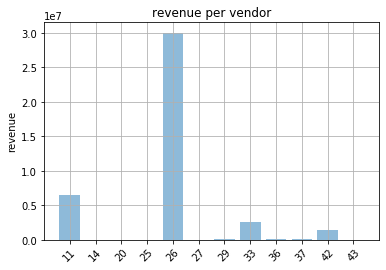

In [14]:
v11 = transactions[transactions["vendor"]== "vendor11"]['revenue'].sum()
v14 = transactions[transactions["vendor"]== "vendor14"]['revenue'].sum()
v20 = transactions[transactions["vendor"]== "vendor20"]['revenue'].sum()
v25 = transactions[transactions["vendor"]== "vendor25"]['revenue'].sum()
v26 = transactions[transactions["vendor"]== "vendor26"]['revenue'].sum()
v27 = transactions[transactions["vendor"]== "vendor27"]['revenue'].sum()
v29 = transactions[transactions["vendor"]== "vendor29"]['revenue'].sum()
v33 = transactions[transactions["vendor"]== "vendor33"]['revenue'].sum()
v36 = transactions[transactions["vendor"]== "vendor36"]['revenue'].sum()
v37 = transactions[transactions["vendor"]== "vendor37"]['revenue'].sum()
v42 = transactions[transactions["vendor"]== "vendor42"]['revenue'].sum()
v43 = transactions[transactions["vendor"]== "vendor43"]['revenue'].sum()

Months = ('11', '14', '20', '25', '26','27', '29', '33', '36', '37','42','43')
ind = np.arange(len(Months))
incidentCount = [v11,v14,v20,v25,v26,v27,v29,v33,v36,v37,v42,v43]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('revenue')
plt.title('revenue per vendor')
plt.grid()
plt.show()

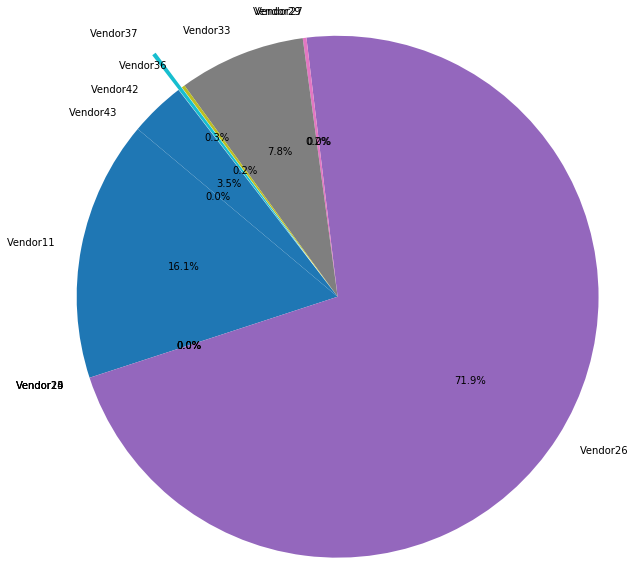

In [39]:
#transactions per vendor

v11 = transactions[transactions["vendor"]== "vendor11"].shape[0]
v14 = transactions[transactions["vendor"]== "vendor14"].shape[0]
v20 = transactions[transactions["vendor"]== "vendor20"].shape[0]
v25 = transactions[transactions["vendor"]== "vendor25"].shape[0]
v26 = transactions[transactions["vendor"]== "vendor26"].shape[0]
v27 = transactions[transactions["vendor"]== "vendor27"].shape[0]
v29 = transactions[transactions["vendor"]== "vendor29"].shape[0]
v33 = transactions[transactions["vendor"]== "vendor33"].shape[0]
v36 = transactions[transactions["vendor"]== "vendor36"].shape[0]
v37 = transactions[transactions["vendor"]== "vendor37"].shape[0]
v42 = transactions[transactions["vendor"]== "vendor42"].shape[0]
v43 = transactions[transactions["vendor"]== "vendor43"].shape[0]

total = transactions.shape[0]

labels = 'Vendor11', 'Vendor14', 'Vendor20', 'Vendor25', 'Vendor26', 'Vendor27', 'Vendor29', 'Vendor33', 'Vendor36', 'Vendor37', 'Vendor42', 'Vendor43'
sizes = [v11/total, v14/total, v20/total, v25/total,v26/total,v27/total,v29/total,v33/total,v36/total,v37/total,v42/total,v43/total]
explode = (0, 0,0,0,0,0,0,0,0,0.5,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, radius=3)
#plt.savefig('most transactions.png')
plt.show()

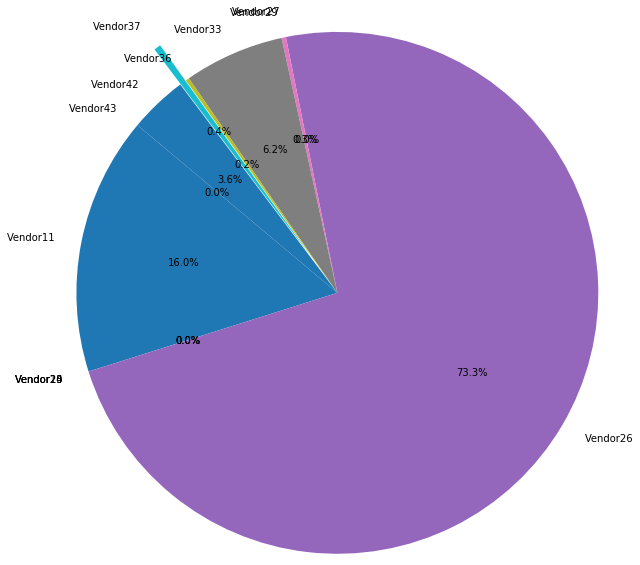

In [53]:
#sum revenue per vendor

v11 = transactions[transactions["vendor"]== "vendor11"]['revenue'].sum()
v14 = transactions[transactions["vendor"]== "vendor14"]['revenue'].sum()
v20 = transactions[transactions["vendor"]== "vendor20"]['revenue'].sum()
v25 = transactions[transactions["vendor"]== "vendor25"]['revenue'].sum()
v26 = transactions[transactions["vendor"]== "vendor26"]['revenue'].sum()
v27 = transactions[transactions["vendor"]== "vendor27"]['revenue'].sum()
v29 = transactions[transactions["vendor"]== "vendor29"]['revenue'].sum()
v33 = transactions[transactions["vendor"]== "vendor33"]['revenue'].sum()
v36 = transactions[transactions["vendor"]== "vendor36"]['revenue'].sum()
v37 = transactions[transactions["vendor"]== "vendor37"]['revenue'].sum()
v42 = transactions[transactions["vendor"]== "vendor42"]['revenue'].sum()
v43 = transactions[transactions["vendor"]== "vendor43"]['revenue'].sum()

total = v11+v14+v20+v25+v26+v27+v29+v33+v36+v37+v42+v43

labels = 'Vendor11', 'Vendor14', 'Vendor20', 'Vendor25', 'Vendor26', 'Vendor27', 'Vendor29', 'Vendor33', 'Vendor36', 'Vendor37', 'Vendor42', 'Vendor43'
sizes = [v11/total, v14/total, v20/total, v25/total,v26/total,v27/total,v29/total,v33/total,v36/total,v37/total,v42/total,v43/total]
explode = (0, 0,0,0,0,0,0,0,0,0.5,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, radius=3)
plt.savefig('most transactions.png')
plt.show()

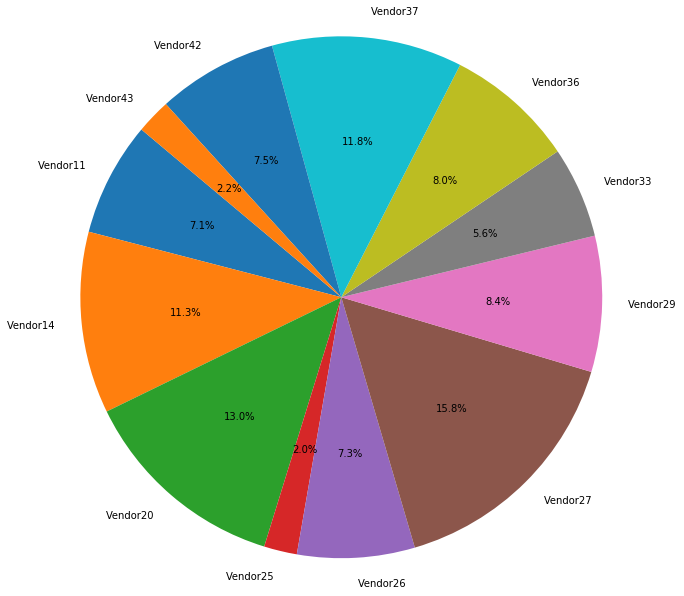

In [20]:
#mean revenue per transaction per vendor

v11 = transactions[transactions["vendor"]== "vendor11"]['revenue'].mean()
v14 = transactions[transactions["vendor"]== "vendor14"]['revenue'].mean()
v20 = transactions[transactions["vendor"]== "vendor20"]['revenue'].mean()
v25 = transactions[transactions["vendor"]== "vendor25"]['revenue'].mean()
v26 = transactions[transactions["vendor"]== "vendor26"]['revenue'].mean()
v27 = transactions[transactions["vendor"]== "vendor27"]['revenue'].mean()
v29 = transactions[transactions["vendor"]== "vendor29"]['revenue'].mean()
v33 = transactions[transactions["vendor"]== "vendor33"]['revenue'].mean()
v36 = transactions[transactions["vendor"]== "vendor36"]['revenue'].mean()
v37 = transactions[transactions["vendor"]== "vendor37"]['revenue'].mean()
v42 = transactions[transactions["vendor"]== "vendor42"]['revenue'].mean()
v43 = transactions[transactions["vendor"]== "vendor43"]['revenue'].mean()

total = v11+v14+v20+v25+v26+v27+v29+v33+v36+v37+v42+v43

labels = 'Vendor11', 'Vendor14', 'Vendor20', 'Vendor25', 'Vendor26', 'Vendor27', 'Vendor29', 'Vendor33', 'Vendor36', 'Vendor37', 'Vendor42', 'Vendor43'
sizes = [v11/total, v14/total, v20/total, v25/total,v26/total,v27/total,v29/total,v33/total,v36/total,v37/total,v42/total,v43/total]
explode = (0, 0,0,0,0,0,0,0,0,0,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, radius=3)
#plt.savefig('most transactions.png')
plt.show()

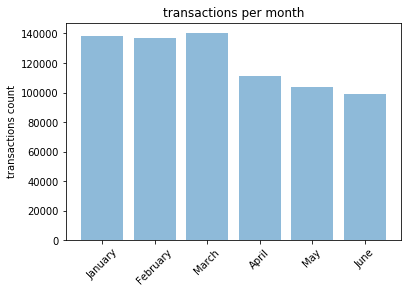

In [54]:
jan = transactions[transactions.month == 1].month.value_counts()
feb = transactions[transactions.month == 2].month.value_counts()
mar = transactions[transactions.month == 3].month.value_counts()
apr = transactions[transactions.month == 4].month.value_counts()
may = transactions[transactions.month == 5].month.value_counts()
jun = transactions[transactions.month == 6].month.value_counts()


Months = ('January', 'February', 'March', 'April', 'May','June')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,98880]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('transactions count')
plt.title('transactions per month')
plt.savefig('transaction per month.png')
plt.show()

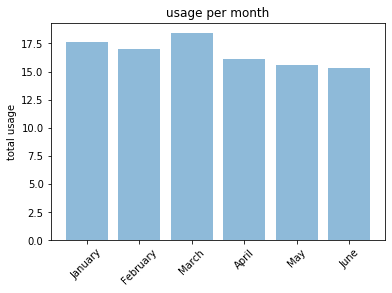

In [126]:
jan = users[users.month == 1].relative_active_users.sum()
feb = users[users.month == 2].relative_active_users.sum()
mar = users[users.month == 3].relative_active_users.sum()
apr = users[users.month == 4].relative_active_users.sum()
may = users[users.month == 5].relative_active_users.sum()
jun = users[users.month == 6].relative_active_users.sum()


Months = ('January', 'February', 'March', 'April', 'May','June')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,15.296007736308859]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('total usage')
plt.title('usage per month')
#plt.savefig('per month.png')
plt.show()

In [101]:
users[users.month == 6].relative_active_users.sum()

15.296007736308859

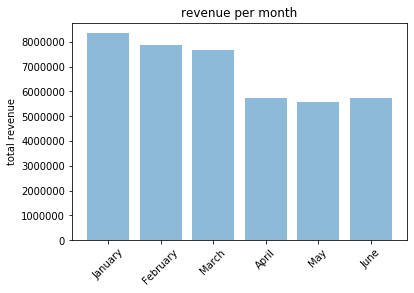

In [65]:
jan = transactions[transactions.month == 1].revenue.sum()
feb = transactions[transactions.month == 2].revenue.sum()
mar = transactions[transactions.month == 3].revenue.sum()
apr = transactions[transactions.month == 4].revenue.sum()
may = transactions[transactions.month == 5].revenue.sum()
jun = transactions[transactions.month == 6].revenue.sum()


Months = ('January', 'February', 'March', 'April', 'May','June')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,jun]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('total revenue')
plt.title('revenue per month')
#plt.savefig('per month.png')
plt.show()

In [25]:
transactions[transactions.month == 6].month.value_counts()

6    98880
Name: month, dtype: int64

In [16]:
vendor37 = transactions[transactions.vendor == 'vendor37']

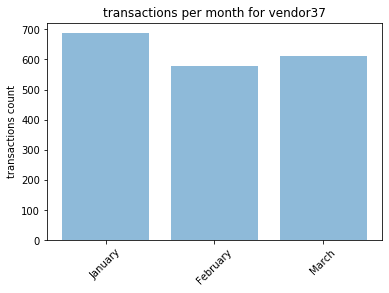

In [125]:
jan = vendor37[vendor37.month == 1].month.value_counts()
feb = vendor37[vendor37.month == 2].month.value_counts()
mar = vendor37[vendor37.month == 3].month.value_counts()


Months = ('January', 'February', 'March')
ind = np.arange(len(Months))
incidentCount = [jan,feb,612]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('transactions count')
plt.title('transactions per month for vendor37')
#plt.savefig('per month.png')
plt.show()

In [52]:
vendor37[vendor37.month == 3].revenue.sum()

56091.73329328174

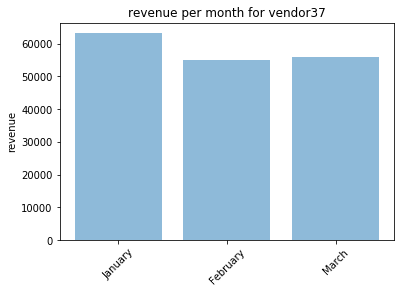

In [124]:
jan = vendor37[vendor37.month == 1].revenue.sum()
feb = vendor37[vendor37.month == 2].revenue.sum()
mar = vendor37[vendor37.month == 3].revenue.sum()


Months = ('January', 'February', 'March')
ind = np.arange(len(Months))
incidentCount = [jan,feb,56091.73329328174]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('revenue')
plt.title('revenue per month for vendor37')
#plt.savefig('per month.png')
plt.show()

In [ ]:
jan = users[transactions.month == 1].revenue.sum()
feb = users[transactions.month == 2].revenue.sum()
mar = users[transactions.month == 3].revenue.sum()
apr = users[transactions.month == 4].revenue.sum()
may = users[transactions.month == 5].revenue.sum()
jun = users[transactions.month == 6].revenue.sum()


Months = ('January', 'February', 'March', 'April', 'May','June')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,jun]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('total revenue')
plt.title('revenue per month')
#plt.savefig('figures/per month.png')
plt.show()

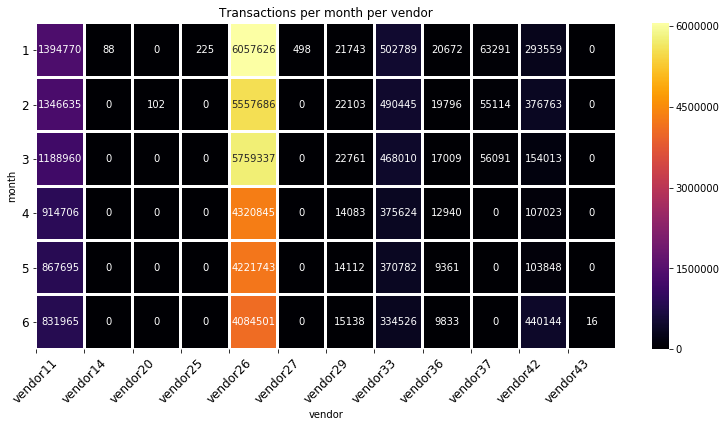

In [63]:
kills_my = pd.pivot_table(index="vendor",columns="month",data=transactions,values="revenue",aggfunc="sum").fillna(0)

Months = ('vendor11', 'vendor14', 'vendor20', 'vendor25', 'vendor26','vendor27', 'vendor29', 'vendor33', 'vendor36', 'vendor37','vendor42', 'vendor43')
ind = np.arange(len(Months))

for i in kills_my.columns:
    kills_my[i] = kills_my[i].astype(np.int64)
plt.figure(figsize=(13,6))
fig = sns.heatmap(kills_my.transpose(),cmap="inferno",
                  annot=True,fmt="d",linecolor="white",linewidths=2)
plt.xticks(ind, Months, fontsize =12, rotation = 45)
plt.yticks(fontsize =12,rotation=0)
plt.ylabel("month")
plt.xlabel("vendor")
plt.title("Transactions per month per vendor")
plt.savefig('heat map - transaction per month per vendor.png')
plt.show()

In [58]:
users123 = users[users.month <4]

In [60]:
users123.relative_active_users.sum()

53.02763255166327

In [61]:
users456 = users[users.month >3]

In [62]:
users456.relative_active_users.sum()

46.97236744833673